<h3>Printing data to look at the columns required for preprocessing</h3>

In [1]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import operator
from collections import defaultdict
import math
%matplotlib inline

In [2]:
#reading the file
df = pd.read_csv("data/bin.csv")
df.head(100)

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Record#,CIP# Only,Major Program Name,Degree Level,NCWIT Participant,Institution,What degrees does your institution offer?,School Year,When do students typically declare their major?,"Enroll, Female: Avg. ACT Math Score (Enrl F)",...,Nonresident Alien (Min. M).1,Race/Ethnicity Unknown (Min. M).1,Nonresident Alien (Min. F).2,Race/Ethnicity Unknown (Min. F).2,Nonresident Alien (Min. M).2,Race/Ethnicity Unknown (Min. M).2,Nonresident Alien (Tot. F),Race/Ethnicity Unknown (Tot. F),Nonresident Alien (Tot. M),Race/Ethnicity Unknown (Tot. M)
0,1231.0,11.01,CS and/or Eng Multiple Majors (data submitted ...,Bachelor's,"Extension Services, Academic Alliance",456.0,Bachelor's and master's degrees only,2005-2006,End of 2nd Year,27.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1232.0,11.01,CS and/or Eng Multiple Majors (data submitted ...,Bachelor's,"Extension Services, Academic Alliance",456.0,Bachelor's and master's degrees only,2006-2007,End of 2nd Year,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1233.0,11.01,CS and/or Eng Multiple Majors (data submitted ...,Bachelor's,"Extension Services, Academic Alliance",456.0,Bachelor's and master's degrees only,2007-2008,End of 2nd Year,27.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1234.0,11.01,CS and/or Eng Multiple Majors (data submitted ...,Bachelor's,"Extension Services, Academic Alliance",456.0,Bachelor's and master's degrees only,2008-2009,End of 2nd Year,31.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1235.0,11.01,CS and/or Eng Multiple Majors (data submitted ...,Bachelor's,"Extension Services, Academic Alliance",456.0,Bachelor's and master's degrees only,2009-2010,End of 2nd Year,27.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1236.0,11.01,CS and/or Eng Multiple Majors (data submitted ...,Bachelor's,"Extension Services, Academic Alliance",456.0,Bachelor's and master's degrees only,2010-2011,End of 2nd Year,24.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1237.0,11.01,CS and/or Eng Multiple Majors (data submitted ...,Bachelor's,"Extension Services, Academic Alliance",456.0,Bachelor's and master's degrees only,2011-2012,End of 2nd Year,26.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1498.0,11.01,Computer Science / Engineering,Bachelor's,"Extension Services, Academic Alliance",128.0,"Bachelor's, master's, and Ph.D. degrees",2004-2005,Upon Enrollment,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1499.0,11.01,Computer Science / Engineering,Bachelor's,"Extension Services, Academic Alliance",128.0,"Bachelor's, master's, and Ph.D. degrees",2005-2006,Upon Enrollment,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1500.0,11.01,Computer Science / Engineering,Bachelor's,"Extension Services, Academic Alliance",128.0,"Bachelor's, master's, and Ph.D. degrees",2006-2007,Upon Enrollment,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
number_records = len(df)
number_records

3905

<h2>CIP cleaning and Visualization </h2>

In [4]:
list(set(df["CIP# Only"]))
#so it has a mix of string and float

[nan,
 '11.9900',
 '52.1200',
 '14.0100',
 11.1,
 11.0103,
 11.0104,
 11.01,
 11.0199,
 11.02,
 11.04,
 11.05,
 11.07,
 11.0702,
 '15.0100',
 '26.1100',
 '14.4500',
 '11.1006',
 '11.1000',
 '16.0100',
 '13.0100',
 '14.0903',
 '14.3600',
 '14.0900',
 11.0703,
 11.0801,
 11.0802,
 11.09,
 11.08,
 '14.0700',
 '14.1000',
 '27.0300',
 '15.0000',
 '27.0100',
 '12.0100',
 '15.0303',
 '14.0200',
 '?',
 '14.0000',
 '14.2700',
 '11.1001',
 '11.1002',
 '14.1800',
 '11.1003',
 '14.0800',
 '15.0600',
 '14.1900']

In [5]:
df = df[df["CIP# Only"] != '?']

for i,row in df.iterrows():
    df.set_value(i,"CIP# Only",format(float(row["CIP# Only"]),'0.4f'))


df["CIP# Only"]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


0       11.0100
1       11.0100
2       11.0100
3       11.0100
4       11.0100
5       11.0100
6       11.0100
7       11.0100
8       11.0100
9       11.0100
10      11.0100
11      11.0100
12      11.0100
13      11.0100
14      11.0100
15      11.0100
16      11.0100
17      11.0100
18      11.0100
19      11.0100
20      11.0100
21      11.0100
22      11.0100
23      11.0100
24      11.0100
25      11.0100
26      11.0100
27      11.0100
28      11.0100
29      11.0100
         ...   
3875        nan
3876        nan
3877        nan
3878        nan
3879        nan
3880        nan
3881        nan
3882        nan
3883        nan
3884        nan
3885        nan
3886        nan
3887        nan
3888        nan
3889        nan
3890        nan
3891        nan
3892        nan
3893        nan
3894        nan
3895        nan
3896        nan
3897        nan
3898        nan
3899        nan
3900        nan
3901        nan
3902        nan
3903        nan
3904        nan
Name: CIP# Only, Length:

In [6]:
# data cleaning of string and floats in cpi

_cpi = set(df["CIP# Only"])
_cpi

{'11.0100',
 '11.0103',
 '11.0104',
 '11.0199',
 '11.0200',
 '11.0400',
 '11.0500',
 '11.0700',
 '11.0702',
 '11.0703',
 '11.0800',
 '11.0801',
 '11.0802',
 '11.0900',
 '11.1000',
 '11.1001',
 '11.1002',
 '11.1003',
 '11.1006',
 '11.9900',
 '12.0100',
 '13.0100',
 '14.0000',
 '14.0100',
 '14.0200',
 '14.0700',
 '14.0800',
 '14.0900',
 '14.0903',
 '14.1000',
 '14.1800',
 '14.1900',
 '14.2700',
 '14.3600',
 '14.4500',
 '15.0000',
 '15.0100',
 '15.0303',
 '15.0600',
 '16.0100',
 '26.1100',
 '27.0100',
 '27.0300',
 '52.1200',
 'nan'}

In [7]:
no_cip = len(_cpi)
no_cip

45

In [8]:
#Counting for every cpi
cip_counter = Counter(df["CIP# Only"])
cip_counter.items()
l = sorted(cip_counter.items(), key=operator.itemgetter(1),reverse=True)
x = list()
y = list()
for _x,_y in l:
    x.append(_x)
    y.append(_y)

Text(0.5,0,'Top 20 CPI')

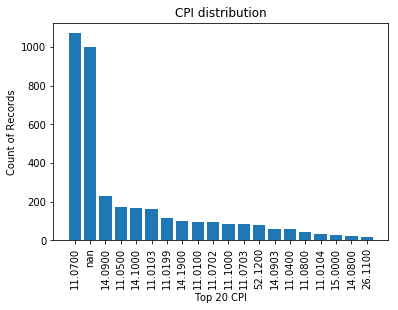

In [9]:
y_val = range(0,len(cip_counter))
plt.title("CPI distribution")
plt.bar(y_val[:20],y[:20])
plt.xticks(y_val[:20], x[:20],rotation=90)
plt.ylabel("Count of Records")
plt.xlabel("Top 20 CPI")

<h3> Binning on GPA </h3>
<p> 1. Binning based on high school gpa </p>

In [10]:
df.columns

Index(['Record#', 'CIP# Only', 'Major Program Name', 'Degree Level',
       'NCWIT Participant', 'Institution',
       'What degrees does your institution offer?', 'School Year',
       'When do students typically declare their major?',
       'Enroll, Female: Avg. ACT Math Score (Enrl F)',
       ...
       'Nonresident Alien (Min. M).1', 'Race/Ethnicity Unknown (Min. M).1',
       'Nonresident Alien (Min. F).2', 'Race/Ethnicity Unknown (Min. F).2',
       'Nonresident Alien (Min. M).2', 'Race/Ethnicity Unknown (Min. M).2',
       'Nonresident Alien (Tot. F)', 'Race/Ethnicity Unknown (Tot. F)',
       'Nonresident Alien (Tot. M)', 'Race/Ethnicity Unknown (Tot. M)'],
      dtype='object', length=269)

<h4> Selecting institutes that are having non-null values </h4>

In [11]:
inst = Counter(df["Institution"])
_inst_not_null = defaultdict(int)
for i,row in df.iterrows():
    if not (math.isnan(row["Enroll, Female: Average HS GPA (Enrl F)"])  or math.isnan(row["Freshmen, Female: Cumulative GPA (Fshm F)"]) or math.isnan(row["Sophomores, Female: Cumulative GPA (Sph. F)"]) or math.isnan(row["Juniors, Female: Cumulative GPA (Jun. F)"]) or math.isnan(row["Seniors, Female: Cumulative GPA (Sen. F)"])):
        _inst_not_null[row["Institution"]] +=1

_inst_not_null = sorted(_inst_not_null.items(), key=operator.itemgetter(1),reverse=True)

inst_considering = list()

for i in range(15):
    inst_considering.append(_inst_not_null[i][0])

In [12]:
inst_considering

[487.0,
 287.0,
 13.0,
 194.0,
 182.0,
 373.0,
 319.0,
 115.0,
 85.0,
 157.0,
 489.0,
 324.0,
 361.0,
 249.0,
 205.0]

<h3>Populating the required data in nested dictionaries</h3>

In [13]:
hs_gpa = defaultdict(lambda : defaultdict(lambda : defaultdict(lambda: defaultdict(list))))

for i,row in df.iterrows():
    if row["Institution"] in inst_considering:
        #Freshman 
        #Male
        if not math.isnan(row["Freshmen, Male: Cumulative GPA (Fshm M)"]):
            hs_gpa[str(row["Institution"])]["freshman"]["male"][format(row["Enroll, Male: Average HS GPA (Enrl M)"],"0.1f")].append(row["Freshmen, Male: Cumulative GPA (Fshm M)"])
            hs_gpa[str(row["Institution"])]["freshman"]["all"][format(row["Enroll, Male: Average HS GPA (Enrl M)"],"0.1f")].append(row["Freshmen, Male: Cumulative GPA (Fshm M)"])
            hs_gpa[str(0)]["freshman"]["male"][format(row["Enroll, Male: Average HS GPA (Enrl M)"],"0.1f")].append(row["Freshmen, Male: Cumulative GPA (Fshm M)"])
            hs_gpa[str(0)]["freshman"]["all"][format(row["Enroll, Male: Average HS GPA (Enrl M)"],"0.1f")].append(row["Freshmen, Male: Cumulative GPA (Fshm M)"])
        else:
            pass

        #Female
        if not math.isnan(row["Freshmen, Female: Cumulative GPA (Fshm F)"]):
            hs_gpa[str(row["Institution"])]["freshman"]["female"][format(row["Enroll, Female: Average HS GPA (Enrl F)"],"0.1f")].append(row["Freshmen, Female: Cumulative GPA (Fshm F)"])
            hs_gpa[str(row["Institution"])]["freshman"]["all"][format(row["Enroll, Female: Average HS GPA (Enrl F)"],"0.1f")].append(row["Freshmen, Female: Cumulative GPA (Fshm F)"])
            hs_gpa[str(0)]["freshman"]["female"][format(row["Enroll, Female: Average HS GPA (Enrl F)"],"0.1f")].append(row["Freshmen, Female: Cumulative GPA (Fshm F)"])
            hs_gpa[str(0)]["freshman"]["all"][format(row["Enroll, Female: Average HS GPA (Enrl F)"],"0.1f")].append(row["Freshmen, Female: Cumulative GPA (Fshm F)"])
        else:
            pass


        #Sophomore
        #male
        if not math.isnan(row["Sophomores, Male: Cumulative GPA (Sph. M)"]):
            hs_gpa[str(row["Institution"])]["sophomore"]["male"][format(row["Enroll, Male: Average HS GPA (Enrl M)"],"0.1f")].append(row["Sophomores, Male: Cumulative GPA (Sph. M)"])
            hs_gpa[str(row["Institution"])]["sophomore"]["all"][format(row["Enroll, Male: Average HS GPA (Enrl M)"],"0.1f")].append(row["Sophomores, Male: Cumulative GPA (Sph. M)"])
            hs_gpa[str(0)]["sophomore"]["male"][format(row["Enroll, Male: Average HS GPA (Enrl M)"],"0.1f")].append(row["Sophomores, Male: Cumulative GPA (Sph. M)"])
            hs_gpa[str(0)]["sophomore"]["all"][format(row["Enroll, Male: Average HS GPA (Enrl M)"],"0.1f")].append(row["Sophomores, Male: Cumulative GPA (Sph. M)"])
        else:
            pass
        #female
        if not math.isnan(row["Sophomores, Female: Cumulative GPA (Sph. F)"]):
            hs_gpa[str(row["Institution"])]["sophomore"]["female"][format(row["Enroll, Female: Average HS GPA (Enrl F)"],"0.1f")].append(row["Sophomores, Female: Cumulative GPA (Sph. F)"])
            hs_gpa[str(row["Institution"])]["sophomore"]["all"][format(row["Enroll, Female: Average HS GPA (Enrl F)"],"0.1f")].append(row["Sophomores, Female: Cumulative GPA (Sph. F)"])
            hs_gpa[str(0)]["sophomore"]["female"][format(row["Enroll, Female: Average HS GPA (Enrl F)"],"0.1f")].append(row["Sophomores, Female: Cumulative GPA (Sph. F)"])
            hs_gpa[str(0)]["sophomore"]["all"][format(row["Enroll, Female: Average HS GPA (Enrl F)"],"0.1f")].append(row["Sophomores, Female: Cumulative GPA (Sph. F)"])
        else:
            pass
        
        #Junior
        #male
        if not math.isnan(row["Juniors, Male: Cumulative GPA (Jun. M)"]):
            hs_gpa[str(row["Institution"])]["junior"]["male"][format(row["Enroll, Male: Average HS GPA (Enrl M)"],"0.1f")].append(row["Juniors, Male: Cumulative GPA (Jun. M)"])
            hs_gpa[str(row["Institution"])]["junior"]["all"][format(row["Enroll, Male: Average HS GPA (Enrl M)"],"0.1f")].append(row["Juniors, Male: Cumulative GPA (Jun. M)"])
            hs_gpa[str(0)]["junior"]["male"][format(row["Enroll, Male: Average HS GPA (Enrl M)"],"0.1f")].append(row["Juniors, Male: Cumulative GPA (Jun. M)"])
            hs_gpa[str(0)]["junior"]["all"][format(row["Enroll, Male: Average HS GPA (Enrl M)"],"0.1f")].append(row["Juniors, Male: Cumulative GPA (Jun. M)"])
        else:
            pass
        #female
        if not math.isnan(row["Juniors, Female: Cumulative GPA (Jun. F)"]):
            hs_gpa[str(row["Institution"])]["junior"]["female"][format(row["Enroll, Female: Average HS GPA (Enrl F)"],"0.1f")].append(row["Juniors, Female: Cumulative GPA (Jun. F)"])
            hs_gpa[str(row["Institution"])]["junior"]["all"][format(row["Enroll, Female: Average HS GPA (Enrl F)"],"0.1f")].append(row["Juniors, Female: Cumulative GPA (Jun. F)"])
            hs_gpa[str(0)]["junior"]["female"][format(row["Enroll, Female: Average HS GPA (Enrl F)"],"0.1f")].append(row["Juniors, Female: Cumulative GPA (Jun. F)"])
            hs_gpa[str(0)]["junior"]["all"][format(row["Enroll, Female: Average HS GPA (Enrl F)"],"0.1f")].append(row["Juniors, Female: Cumulative GPA (Jun. F)"])
        else:
            pass
        #Senior
        #male
        if not math.isnan(row["Seniors, Male: Cumulative GPA (Sen. M)"]):
            hs_gpa[str(row["Institution"])]["senior"]["male"][format(row["Enroll, Male: Average HS GPA (Enrl M)"],"0.1f")].append(row["Seniors, Male: Cumulative GPA (Sen. M)"])
            hs_gpa[str(row["Institution"])]["senior"]["all"][format(row["Enroll, Male: Average HS GPA (Enrl M)"],"0.1f")].append(row["Seniors, Male: Cumulative GPA (Sen. M)"])
            hs_gpa[str(0)]["senior"]["male"][format(row["Enroll, Male: Average HS GPA (Enrl M)"],"0.1f")].append(row["Seniors, Male: Cumulative GPA (Sen. M)"])
            hs_gpa[str(0)]["senior"]["all"][format(row["Enroll, Male: Average HS GPA (Enrl M)"],"0.1f")].append(row["Seniors, Male: Cumulative GPA (Sen. M)"])
        else:
            pass
        #female
        if not math.isnan(row["Seniors, Female: Cumulative GPA (Sen. F)"]):
            hs_gpa[str(row["Institution"])]["senior"]["female"][format(row["Enroll, Female: Average HS GPA (Enrl F)"],"0.1f")].append(row["Seniors, Female: Cumulative GPA (Sen. F)"])
            hs_gpa[str(row["Institution"])]["senior"]["all"][format(row["Enroll, Female: Average HS GPA (Enrl F)"],"0.1f")].append(row["Seniors, Female: Cumulative GPA (Sen. F)"])
            hs_gpa[str(0)]["senior"]["female"][format(row["Enroll, Female: Average HS GPA (Enrl F)"],"0.1f")].append(row["Seniors, Female: Cumulative GPA (Sen. F)"])
            hs_gpa[str(0)]["senior"]["all"][format(row["Enroll, Female: Average HS GPA (Enrl F)"],"0.1f")].append(row["Seniors, Female: Cumulative GPA (Sen. F)"])
        else:
            pass
hs_gpa

defaultdict(<function __main__.<lambda>>,
            {'0': defaultdict(<function __main__.<lambda>.<locals>.<lambda>>,
                         {'freshman': defaultdict(<function __main__.<lambda>.<locals>.<lambda>.<locals>.<lambda>>,
                                      {'all': defaultdict(list,
                                                   {'2.7': [2.084],
                                                    '2.8': [2.71],
                                                    '3.0': [2.205,
                                                     2.85,
                                                     2.14,
                                                     3.3],
                                                    '3.1': [1.996,
                                                     2.395,
                                                     3.16,
                                                     3.21,
                                                     3.02,
                 

In [14]:
new_dict = defaultdict()
count = 0
for _,z in enumerate(hs_gpa.keys()):
    for _,k in enumerate(hs_gpa[z].keys()):#level of study
        for _,j in enumerate(hs_gpa[z][k].keys()): #level of sex
            for _,i in enumerate(hs_gpa[z][k][j].keys()): #level of hs_gpa
                count = count + 1
                if z != '0':
                    new_dict[i+j+k+str(z)]= {'inst': z, 'hs_gpa': i,'study': k ,'gender': j,'avg': np.round(np.average(hs_gpa[z][k][j][i]),1), 'std': np.round(np.std(hs_gpa[z][k][j][i]),1)}
                else:
                    new_dict[i+j+k+str(z)]= {'inst': 'all', 'hs_gpa': i,'study': k ,'gender': j,'avg': np.round(np.average(hs_gpa[z][k][j][i]),1), 'std': np.round(np.std(hs_gpa[z][k][j][i]),1)}

In [15]:
new_dict

defaultdict(None,
            {'2.7malefreshman205.0': {'avg': 2.1000000000000001,
              'gender': 'male',
              'hs_gpa': '2.7',
              'inst': '205.0',
              'std': 0.0,
              'study': 'freshman'},
             '3.1malefreshman205.0': {'avg': 2.1000000000000001,
              'gender': 'male',
              'hs_gpa': '3.1',
              'inst': '205.0',
              'std': 0.20000000000000001,
              'study': 'freshman'},
             '3.0malefreshman205.0': {'avg': 2.2000000000000002,
              'gender': 'male',
              'hs_gpa': '3.0',
              'inst': '205.0',
              'std': 0.0,
              'study': 'freshman'},
             '3.3malefreshman205.0': {'avg': 2.2999999999999998,
              'gender': 'male',
              'hs_gpa': '3.3',
              'inst': '205.0',
              'std': 0.10000000000000001,
              'study': 'freshman'},
             '3.4malefreshman205.0': {'avg': 2.2999999999999998,
 

<h3>Pushing the data into a json file</h3>

In [16]:
import json
with open('data.json', 'w') as outfile:
    r = json.dump(list(new_dict.values()),outfile)

In [17]:
#setting up the bar plot only for females
_hs_gpa = np.arange(2.0,4.0,0.1)
f_score = [float(x)-avg_hs_gpa["freshman"]["female"][x]['avg'] for x in avg_hs_gpa["freshman"]["female"]]
s_score = [float(x)-avg_hs_gpa["sophomore"]["female"][x]['avg'] for x in avg_hs_gpa["sophomore"]["female"]]
s_score = s_score[1:]


#ploting
# data to plot
n_groups = len(_hs_gpa)
# means_frank = (90, 55, 40, 65)
# means_guido = (85, 62, 54, 20)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, f_score, bar_width,
                 alpha=opacity,
                 color='b',
                 label='F:Freshman')
 
rects2 = plt.bar(index + bar_width, s_score, bar_width,
                 alpha=opacity,
                 color='',
                 label='F:Sophomore')

plt.xlabel('HS_GPA : Female')
plt.ylabel('GPA')
plt.title('Comparing HighSchool GPA with 1st 2 years in college')
plt.xticks(index + bar_width, _hs_gpa)
plt.legend()
 
plt.tight_layout()
plt.show()

NameError: name 'avg_hs_gpa' is not defined

In [ ]:
f_score = [float(x)-avg_hs_gpa["freshman"]["female"][x]['avg'] for x in avg_hs_gpa["freshman"]["female"]]
s_score = [float(x)-avg_hs_gpa["sophomore"]["female"][x]['avg'] for x in avg_hs_gpa["sophomore"]["female"]]

In [ ]:
fscore = list()
for i,x in enumerate(avg_hs_gpa["freshman"]["female"]):
    print(_hs_gpa[i],x)
    if(_hs_gpa[i]==x):
        fscore.append(avg_hs_gpa["freshman"]["female"][x]['avg'])
    else:
        fscore.append(0)

In [ ]:
fscore

In [ ]:
inst = Counter(df["Institution"])

In [ ]:
sorted_inst = sorted(inst.items(), key=operator.itemgetter(1),reverse=True)

In [ ]:
sorted_inst

In [ ]:
_inst_not_null = defaultdict(int)
for i,row in df.iterrows():
    if not (math.isnan(row["Enroll, Female: Average HS GPA (Enrl F)"])  or math.isnan(row["Freshmen, Female: Cumulative GPA (Fshm F)"]) or math.isnan(row["Sophomores, Female: Cumulative GPA (Sph. F)"]) or math.isnan(row["Juniors, Female: Cumulative GPA (Jun. F)"]) or math.isnan(row["Seniors, Female: Cumulative GPA (Sen. F)"])):
        _inst_not_null[row["Institution"]] +=1

In [ ]:
_inst_not_null = sorted(_inst_not_null.items(), key=operator.itemgetter(1),reverse=True)

In [ ]:
_inst_not_null[1][0]